<font size="+12"><center>
    MVPA analysis: SVM
</font></center>

Author:
Egor Ananyev

# Preparation

## Loading packages

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [2]:
mne.set_log_level('warning')  # less verbose output

## Setting parameters

In [3]:
interactive = False  # Whether to render interactive figures such as channel plots
# ...should be set to True on first pass

debug = False

cur_subj = 1
numof_runs = 7  # TEMP; is 7 for subj 01

## Loading evoked data

In [4]:
# data_path = os.path.expanduser("C:\\Users\\egora\\Downloads\\meg\\")
data_path = os.path.expanduser('E:\\meg\\')

cur_subj_str = str(cur_subj).zfill(2)

for cur_run in range(numof_runs):
    cur_run_str = str(cur_run+1).zfill(2)
    fname = os.path.join(data_path,
                             'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg\\sub-' + \
                             cur_subj_str + '_ses-meg_experimental_run-' + cur_run_str + '_proc-sss_300_epo.fif')
    print(fname)
    epochs_run = mne.read_epochs(fname)
    # example append: https://www.programcreek.com/python/example/92634/mne.Epochs
    epochs_run = epochs_run.pick_types(meg=True)
    epochs_run_df = epochs_run.to_data_frame()
    # Normalizing the signal by the baseline:
    epochs_run_std = epochs_run_df.sort_index(level=['condition', 'epoch', 'time'], ascending=[1, 1, 1])
    epochs_run_std = epochs_run_std.loc[pd.IndexSlice[:, :, -100:-1], :].groupby(['condition', 'epoch']).std()
    epochs_run_norm = epochs_run_df / epochs_run_std
    if cur_run == 0:
        epochs_df = epochs_run_norm
    else: 
        epochs_df = epochs_df.append(epochs_run_norm)

E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-01_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-02_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-03_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-04_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-05_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-06_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-07_proc-sss_300_epo.fif


In [5]:
np.shape(epochs_df)

(212477, 306)

In [6]:
epochs_df.columns

Index(['MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123',
       'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141',
       ...
       'MEG2613', 'MEG2621', 'MEG2622', 'MEG2623', 'MEG2631', 'MEG2632',
       'MEG2633', 'MEG2641', 'MEG2642', 'MEG2643'],
      dtype='object', name='channel', length=306)

In [7]:
epochs_df.index

MultiIndex([( 'left/dur1/cont017',  0, -100),
            ( 'left/dur1/cont017',  0,  -97),
            ( 'left/dur1/cont017',  0,  -93),
            ( 'left/dur1/cont017',  0,  -90),
            ( 'left/dur1/cont017',  0,  -87),
            ( 'left/dur1/cont017',  0,  -83),
            ( 'left/dur1/cont017',  0,  -80),
            ( 'left/dur1/cont017',  0,  -77),
            ( 'left/dur1/cont017',  0,  -73),
            ( 'left/dur1/cont017',  0,  -70),
            ...
            ('right/dur4/cont100', 80,  570),
            ('right/dur4/cont100', 80,  573),
            ('right/dur4/cont100', 80,  577),
            ('right/dur4/cont100', 80,  580),
            ('right/dur4/cont100', 80,  583),
            ('right/dur4/cont100', 80,  587),
            ('right/dur4/cont100', 80,  590),
            ('right/dur4/cont100', 80,  593),
            ('right/dur4/cont100', 80,  597),
            ('right/dur4/cont100', 80,  600)],
           names=['condition', 'epoch', 'time'], length=212477)

In [8]:
epochs_df

channel                         MEG0111   MEG0112   MEG0113   MEG0121  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.576067 -1.029522  0.571275  0.491981   
                         -97   0.553957  1.626679 -0.112674 -0.431652   
                         -93  -0.279769  2.322377 -0.267687 -1.575911   
                         -90   0.522749  0.226120  0.893295 -1.309778   
                         -87   0.293753  0.441796  0.232567 -0.783006   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.167930 -1.786224 -3.949863  2.572864   
                          590 -0.474831  0.427726 -4.605781  2.374211   
                          593 -0.942890  1.387941 -4.254599  1.293214   
                          597 -0.754338 -0.794540 -3.232324  1.486582   
                          600 -0.628704 -0.707739 -3.467270  1.626736   

channel                         MEG0122   MEG0123   MEG0131   MEG0132  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.058599 -0.493659  0.663217  0.705375   
                         -97   0.518709  0.751502  0.000823  0.841055   
                         -93   0.892310  0.535878 -0.401346  1.689365   
                         -90   1.095882 -0.012185 -0.096783  1.585785   
                         -87   1.216999  0.366995 -0.292678  0.982597   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.568288 -1.272248  0.698832 -0.696469   
                          590 -2.004040 -0.308461  0.481093 -0.424927   
                          593 -2.234754 -0.672880 -0.247038  0.638557   
                          597 -1.446546 -1.652420 -0.627605  0.637537   
                          600 -1.763028 -1.177448 -0.554681  0.485943   

channel                         MEG0133   MEG0141  ...   MEG2613   MEG2621  \
condition          epoch time                      ...                       
left/dur1/cont017  0     -100 -0.142850  0.806979  ...  1.566507 -0.320609   
                         -97   0.164376  0.925319  ...  1.852537  0.701891   
                         -93   1.405414  0.939116  ...  1.718926  1.992536   
                         -90   1.705368  0.958678  ...  1.127426  0.694928   
                         -87   1.250537  0.805790  ...  1.220103  0.344151   
...                                 ...       ...  ...       ...       ...   
right/dur4/cont100 80     587 -2.553035 -0.457694  ... -4.023089  0.223301   
                          590 -2.576332 -0.439530  ... -3.812698  0.246519   
                          593 -1.360856 -0.768171  ... -3.168895  0.041388   
                          597 -2.971802 -0.941390  ... -3.041159  0.223355   
                          600 -3.810544 -0.852254  ... -3.120419  0.565635   

channel                         MEG2622   MEG2623   MEG2631   MEG2632  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.098164 -0.568150 -0.681471  0.436580   
                         -97   1.580174  1.762313  0.305857  0.453597   
                         -93   1.525474  1.623664  1.588214  1.504487   
                         -90   0.967500 -1.416325  0.141986  1.843892   
                         -87   0.157583 -0.593685  0.242331  0.891950   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -1.035666  1.615875  0.390150  0.163755   
                          590 -1.153710  1.372623  0.536086 -0.088942   
                          593 -1.678995  1.903183  0.600947 -0.834262   
                          597 -2.236237  1.978202  1.009804 -0.769130   
                          600 -2.088028  1.867654  1.373922 -0.603343   

channel                         MEG2633   MEG2641   MEG2642   MEG2643  
condition          epoch time                                  

The path to store MVPA-related data and visualization.

In [9]:
mvpa_path = os.path.join(data_path, 'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg-mvpa\\')
mvpa_fname = os.path.join(mvpa_path, 'sub-' + cur_subj_str)
print(mvpa_fname)

E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg-mvpa\sub-01


## Examining raw data

In [10]:
%matplotlib qt
if interactive:
    raw.plot()

# Support Vector Machines

In [11]:
from sklearn import svm

## Logic of SVM-based classification

In [12]:
## In principle (from https://scikit-learn.org/stable/modules/svm.html):
X = [[0, 0], [1, 1], [2, 2]]  # channel measurements [n_features] on all but one trial [n_samples] at time t
y = [0, 1, 1]                 # stimulus orientation with length [n_samples]
clf = svm.LinearSVC()         # linear Support Vector Classification
clf.fit(X, y)                 # model fitting
clf.predict([[3, 3]])         # model testing on the remaining trial at time t

array([1])

In [13]:
np.shape(X)  # array of size [n_samples, n_features]

(3, 2)

## SVM routine

In [23]:
# This suppresses the sklearn warnings
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [178]:
def run_svm(X_, y_, validate=False, track_=False):
    preds = []
    tests = []
    print('-', end='')
    for cur_test_epoch in range(len(y_)):
        if track_:
            print('.', end='')
        test_epoch = [X_[cur_test_epoch, :]]
        test_class = y_[cur_test_epoch]
        if validate:
            train_epochs = X_
            train_classes = y_
        else:
            train_epochs = X_[np.arange(len(y_))!=cur_test_epoch, :]
            train_classes = y_[np.arange(len(y_))!=cur_test_epoch]
        clf = svm.SVC(cache_size=2000, kernel='sigmoid')
        clf.fit(train_epochs, train_classes)
        preds.append(clf.predict(test_epoch).item(0))
        tests.append(test_class)
#         this_pred = clf.predict(test_epoch).item()
#         print('class = ' + str(test_class) + ' prediction = ' + str(this_pred))
#         preds.append(this_pred)
#     iter_acc = sum(y_ == np.array(preds)) / len(y_)
    iter_acc = sum(np.array(tests) == np.array(preds)) / len(y_)
    print('{0:.2f}'.format(iter_acc), end='')
    return iter_acc

## Iterating through _t_

In [179]:
all_times = np.round(epochs_run.times * 1000).astype(int)
# print(all_times)
print(np.shape(all_times))

(211,)


In [180]:
def iter_times(all_times_, epochs_subset_df_, validate=False, track=False):  #, cur_cond_str_):
    acc_ = []
    counter = 0
    print('[', end='')
    for t in all_times_:
        if (counter == int(len(all_times)/10)):
            print('=', end='')
            counter = 0
        counter += 1
#         X_right = epochs_subset_df_.loc[('right/'+cur_cond_str_, slice(None), t), :].values
#         X_left = epochs_subset_df_.loc[('left/'+cur_cond_str_, slice(None), t), :].values
        X_right = epochs_subset_df_[epochs_subset_df_.index.get_level_values('condition').str.contains('right')].loc[pd.IndexSlice[:, :, t], :]
        X_left = epochs_subset_df_[epochs_subset_df_.index.get_level_values('condition').str.contains('left')].loc[pd.IndexSlice[:, :, t], :]
        X = np.concatenate((X_right, X_left))
        y = np.concatenate((np.repeat(1, len(X_right)), np.repeat(0, len(X_left))))
        acc_.append(run_svm(X, y, validate, track))
    print(']')
    return acc_

# Separate conditions with independent _t_

## Validation

In [ ]:
all_durs = [1, 2, 3, 4]
all_conts = [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=True)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

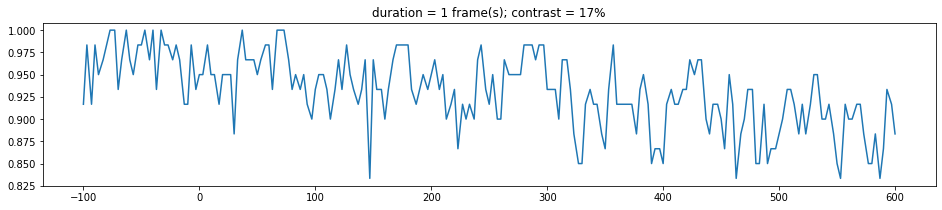

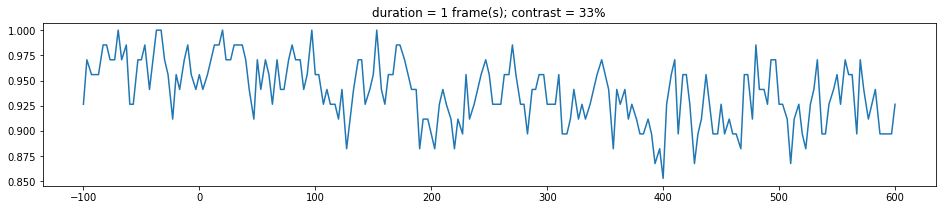

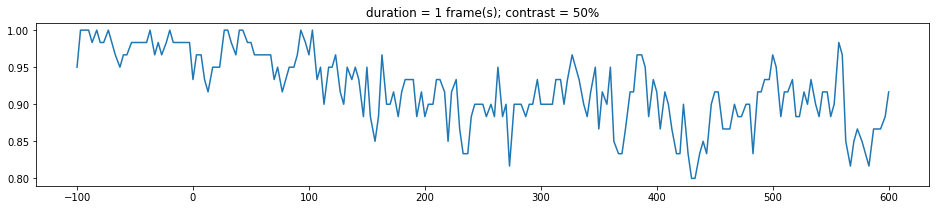

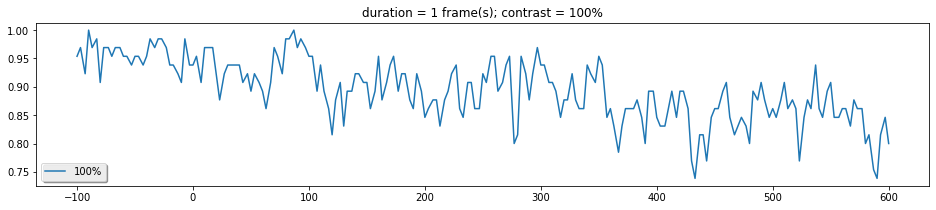

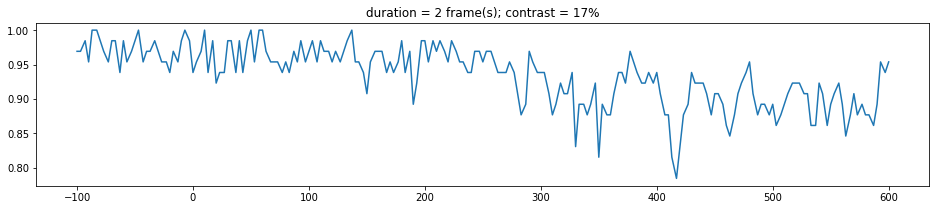

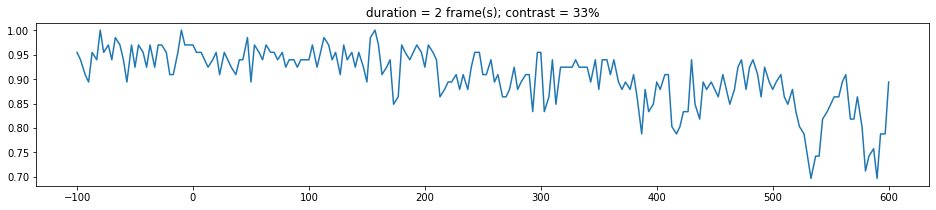

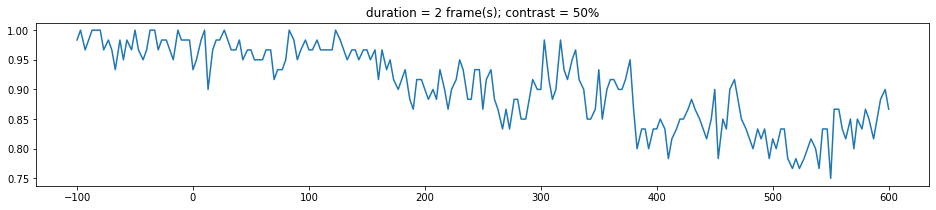

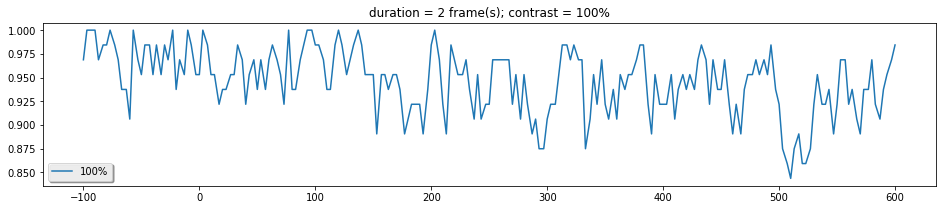

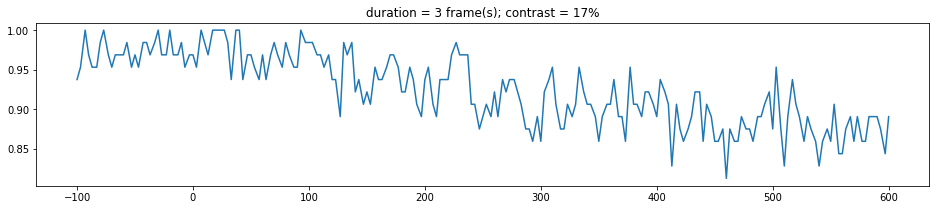

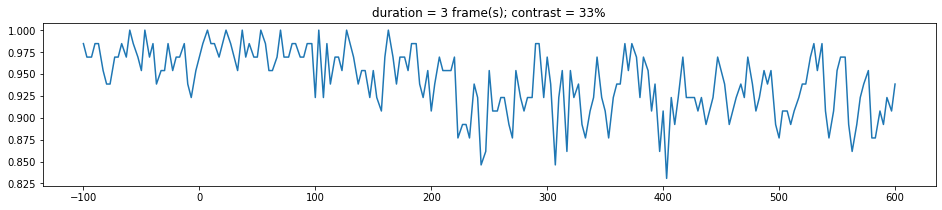

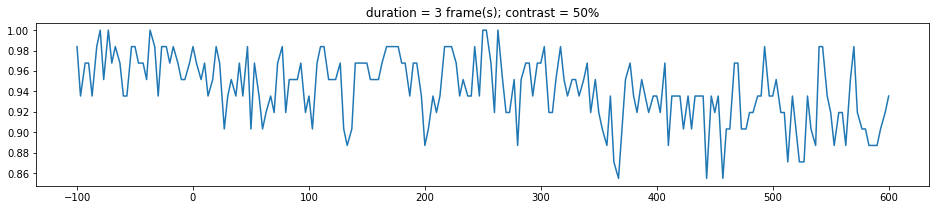

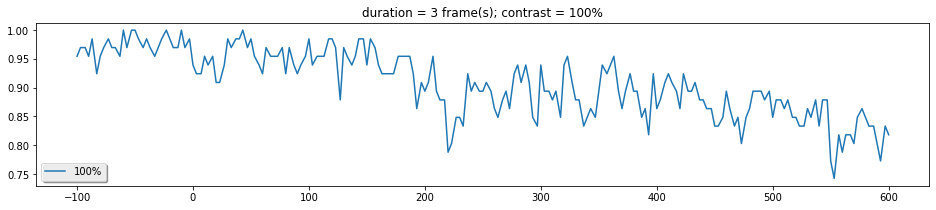

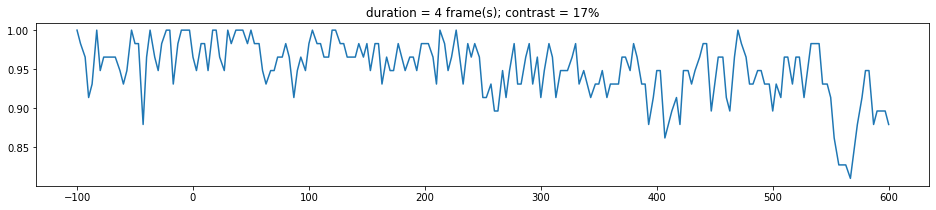

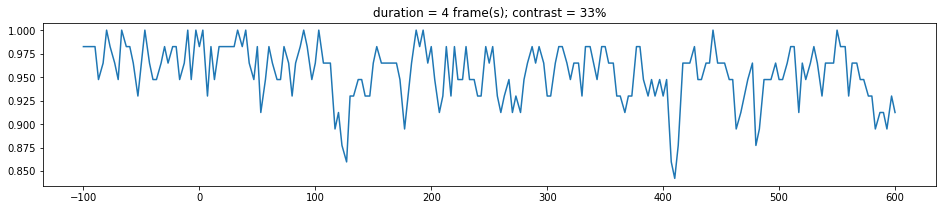

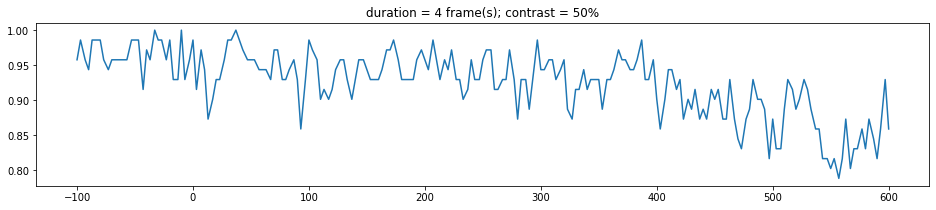

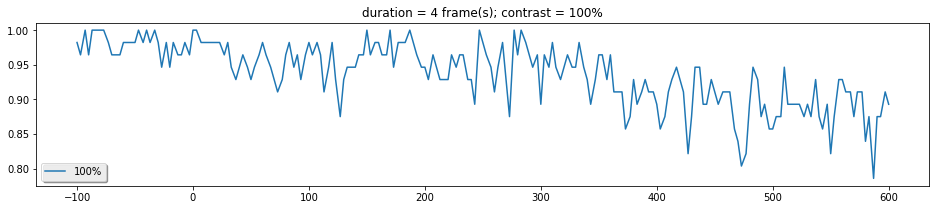

In [110]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

## Training and testing

In [125]:
all_durs = [1, 2, 3, 4]
all_conts = [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=False)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur1/cont017 [==========]
dur1/cont033 [==========]
dur1/cont050 [==========]
dur1/cont100 [==========]
dur2/cont017 [==========]
dur2/cont033 [==========]
dur2/cont050 [==========]
dur2/cont100 [==========]
dur3/cont017 [==========]
dur3/cont033 [==========]
dur3/cont050 [==========]
dur3/cont100 [==========]
dur4/cont017 [==========]
dur4/cont033 [==========]
dur4/cont050 [==========]
dur4/cont100 [==========]


In [126]:
# acc.to_csv(mvpa_fname + '_acc.csv')

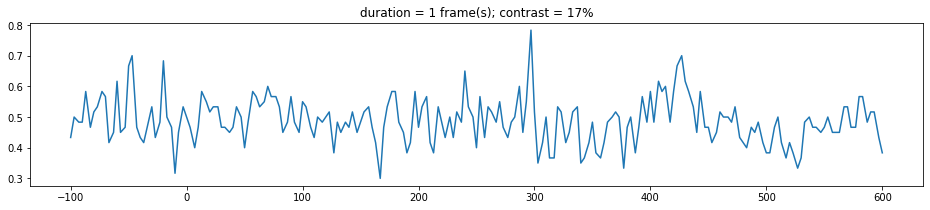

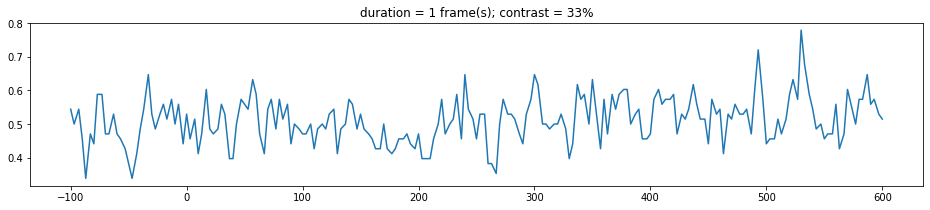

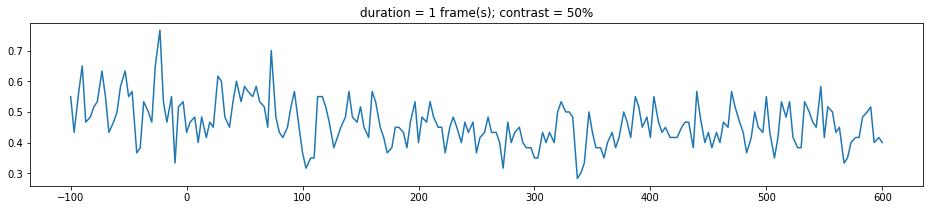

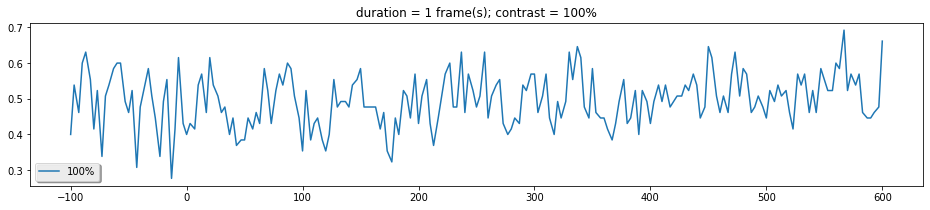

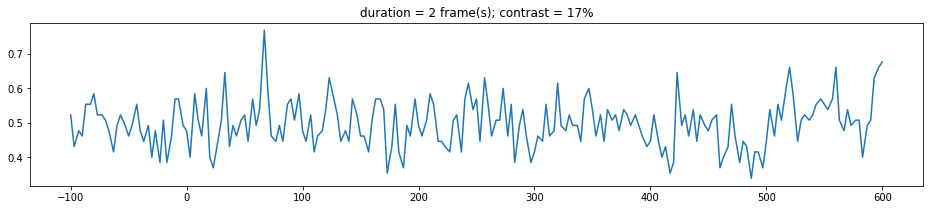

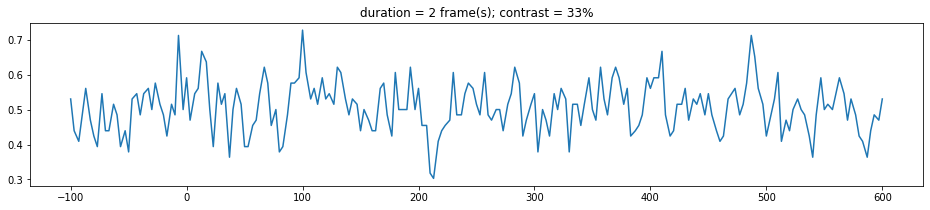

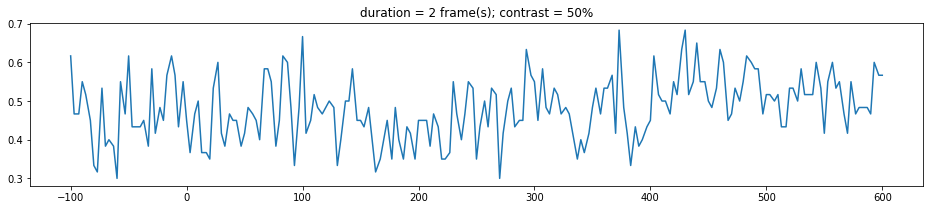

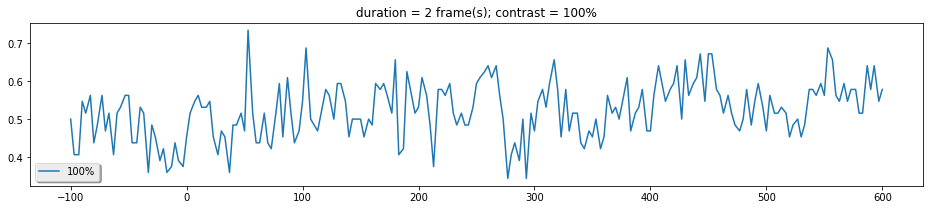

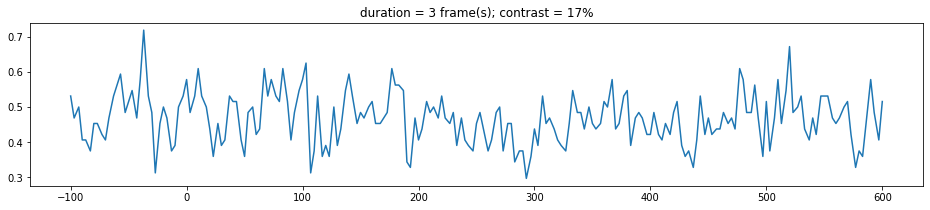

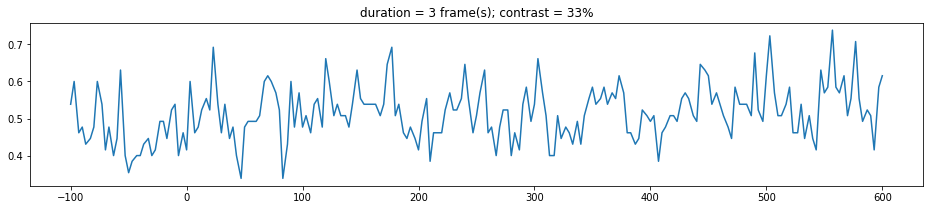

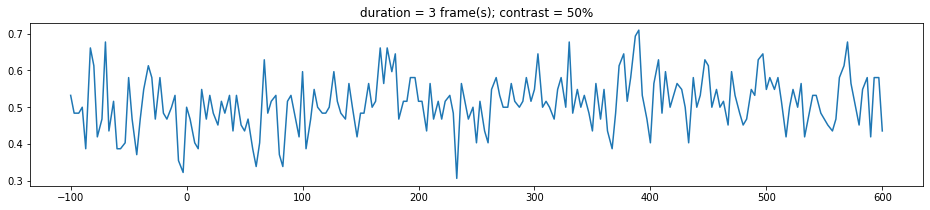

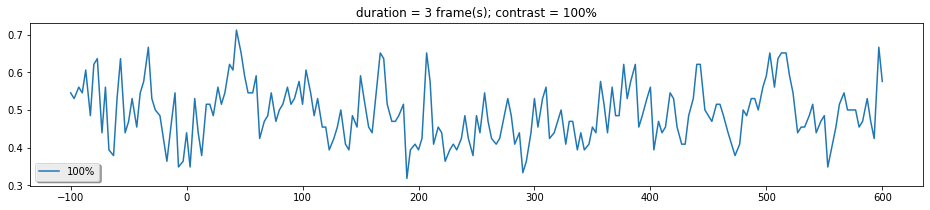

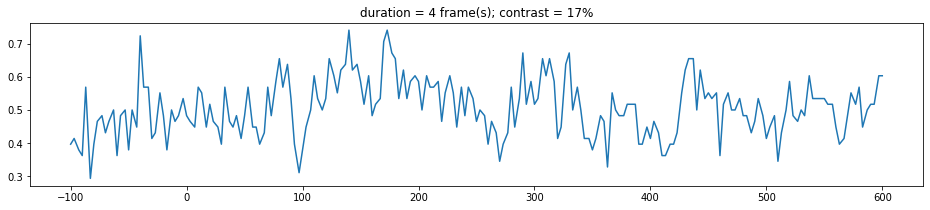

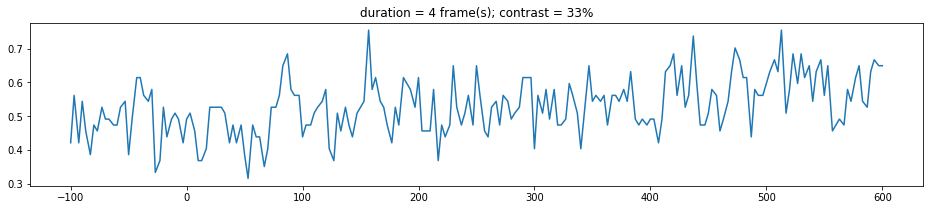

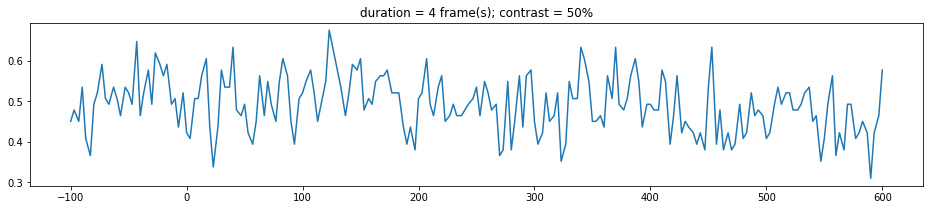

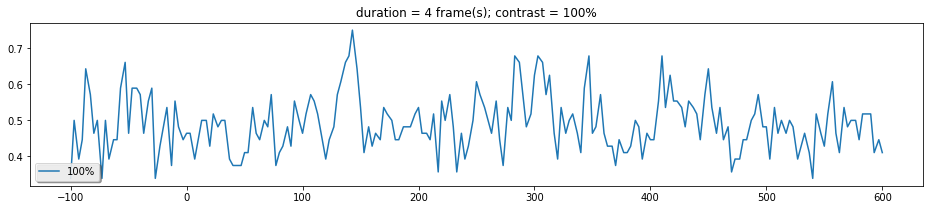

In [127]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

# Combining all conditions

## Validation

In [106]:
acc = pd.DataFrame(np.zeros((1, len(all_times))), columns=all_times)
cur_acc = iter_times(all_times, epochs_df, validate=True)
acc.loc[0, :] = cur_acc

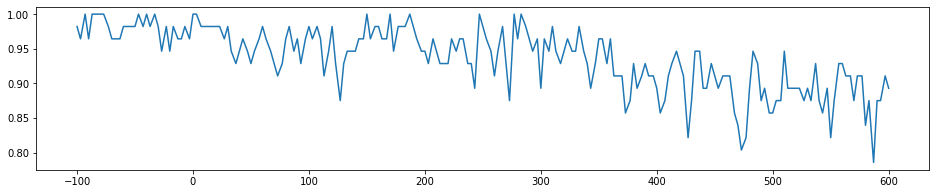

In [107]:
%matplotlib inline
plt.figure(figsize=(16, 3))
plt.plot(all_times, np.array(acc.T));
# plt.savefig(qc_fname + '_light-sensors.pdf')
# leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
# leg.get_frame().set_alpha(0.8)

## Training and testing

In [ ]:
acc = pd.DataFrame(np.zeros((1, len(all_times))), columns=all_times)
cur_acc = iter_times(all_times, epochs_df, validate=False)
acc.loc[0, :] = cur_acc

In [ ]:
%matplotlib inline
plt.figure(figsize=(16, 3))
plt.plot(all_times, np.array(acc.T));
# plt.savefig(qc_fname + '_light-sensors.pdf')
# leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
# leg.get_frame().set_alpha(0.8)

# Iterating through contrasts

In [181]:
all_conts = [17, 33, 50, 100]
acc = pd.DataFrame(np.zeros((len(all_conts), len(all_times))), index=all_conts, columns=all_times)
for cur_cont in range(len(all_conts)):
    cur_cond_str = 'cont' + str(all_conts[cur_cont]).zfill(3)
    print(cur_cond_str, end=' ')
    epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
    cur_acc = iter_times(all_times, epochs_subset_df, validate=False, track=False)  #, cur_cond_str)
    acc.loc[(all_conts[cur_cont]), :] = cur_acc

cont017 [-0.49-0.51-0.44-0.44-0.47-0.54-0.45-0.50-0.47-0.43-0.49-0.40-0.48-0.51-0.48-0.53-0.51-0.50-0.49-0.55-0.43=-0.44-0.52-0.56-0.59-0.48-0.53-0.48-0.40-0.50-0.58-0.57-0.48-0.51-0.48-0.47-0.51-0.45-0.44-0.52-0.53-0.42=-0.52-0.56-0.55-0.56-0.62-0.57-0.52-0.47-0.53-0.56-0.56-0.59-0.57-0.51-0.60-0.58-0.56-0.55-0.51-0.42-0.51=-0.48-0.46-0.52-0.51-0.56-0.50-0.49-0.57-0.49-0.43-0.51-0.53-0.48-0.47-0.50-0.40-0.48-0.53-0.55-0.49-0.47=-0.53-0.55-0.49-0.50-0.46-0.52-0.40-0.50-0.53-0.50-0.49-0.52-0.55-0.53-0.52-0.54-0.48-0.49-0.52-0.53-0.57=-0.49-0.45-0.43-0.43-0.48-0.59-0.50-0.48-0.49-0.51-0.50-0.52-0.46-0.47-0.49-0.52-0.50-0.50-0.48-0.47-0.49=-0.49-0.50-0.51-0.49-0.43-0.44-0.42-0.42-0.50-0.48-0.47-0.45-0.47-0.48-0.50-0.45-0.44-0.43-0.49-0.49-0.47=-0.52-0.53-0.48-0.47-0.48-0.47-0.45-0.45-0.47-0.47-0.51-0.45-0.69-0.49-0.51-0.49-0.51-0.53-0.56-0.49-0.49=-0.47-0.46-0.49-0.47-0.44-0.50-0.47-0.45-0.47-0.51-0.46-0.47-0.49-0.46-0.51-0.49-0.47-0.51-0.51-0.46-0.50=-0.48-0.46-0.51-0.46-0.47-0.49-0.47-0

In [182]:
acc.to_csv(mvpa_fname + '_acc_sigmoid_cont.csv')

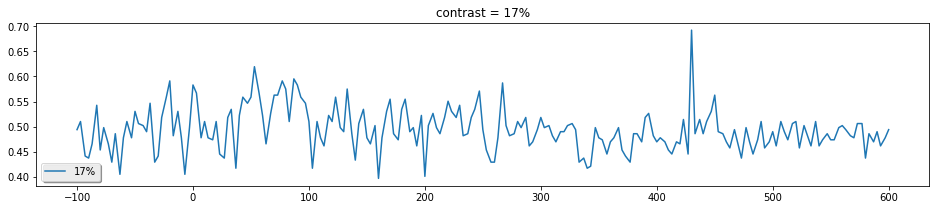

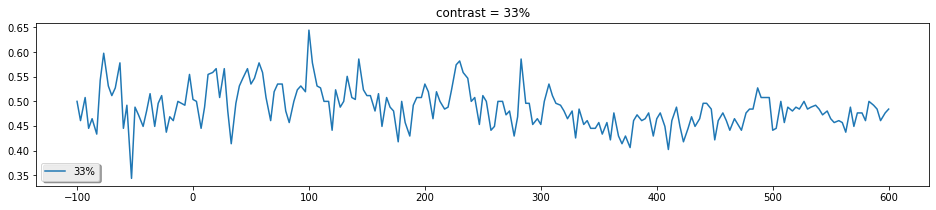

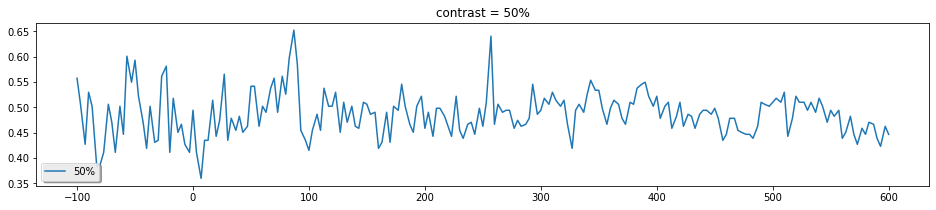

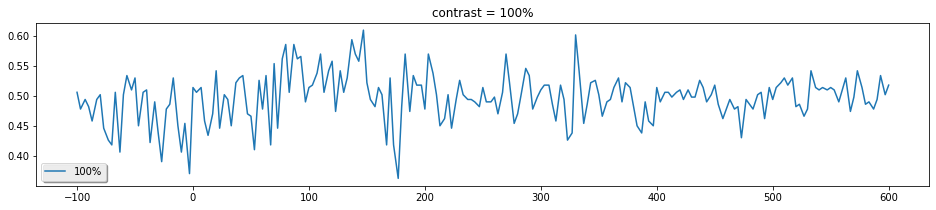

In [183]:
%matplotlib inline
for cur_cont in range(len(all_conts)):
    plt.figure(figsize=(16, 3))
    plt.title(label='contrast = ' + str(all_conts[cur_cont]) + '%')
    plt.plot(all_times, np.array(acc.loc[(all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
    plt.savefig(mvpa_fname + '_sigmoid_cont' + str(all_conts[cur_cont]) + '.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

# Iterating through durations

In [184]:
all_durs = [1, 2, 3, 4]
acc = pd.DataFrame(np.zeros((len(all_durs), len(all_times))), index=all_durs, columns=all_times)
for cur_dur in range(len(all_durs)):
    cur_cond_str = 'dur' + str(all_durs[cur_dur])
    print(cur_cond_str, end=' ')
    epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
    cur_acc = iter_times(all_times, epochs_subset_df, validate=False, track=False)  #, cur_cond_str)
    acc.loc[(all_durs[cur_dur]), :] = cur_acc

dur1 [-0.58-0.53-0.54-0.56-0.51-0.47-0.56-0.48-0.51-0.51-0.55-0.51-0.48-0.58-0.42-0.47-0.46-0.41-0.51-0.48-0.54=-0.57-0.47-0.53-0.46-0.40-0.39-0.51-0.53-0.52-0.45-0.50-0.53-0.55-0.48-0.53-0.54-0.55-0.53-0.57-0.56-0.57=-0.52-0.55-0.55-0.53-0.58-0.50-0.45-0.42-0.42-0.48-0.49-0.52-0.50-0.53-0.53-0.55-0.48-0.52-0.47-0.45-0.51=-0.47-0.39-0.53-0.44-0.42-0.49-0.46-0.48-0.50-0.50-0.55-0.51-0.53-0.51-0.51-0.49-0.45-0.45-0.39-0.42-0.41=-0.46-0.40-0.45-0.46-0.47-0.45-0.44-0.35-0.46-0.49-0.42-0.42-0.42-0.47-0.45-0.51-0.45-0.47-0.49-0.46-0.46=-0.49-0.50-0.44-0.50-0.51-0.53-0.51-0.51-0.52-0.51-0.52-0.50-0.50-0.51-0.49-0.49-0.53-0.54-0.57-0.58-0.56=-0.52-0.49-0.49-0.51-0.48-0.49-0.50-0.53-0.51-0.48-0.49-0.46-0.50-0.50-0.47-0.48-0.48-0.51-0.49-0.54-0.53=-0.49-0.55-0.52-0.49-0.51-0.51-0.48-0.48-0.47-0.49-0.51-0.53-0.51-0.48-0.45-0.47-0.50-0.46-0.48-0.51-0.51=-0.52-0.46-0.46-0.47-0.47-0.48-0.51-0.50-0.52-0.50-0.48-0.48-0.49-0.45-0.49-0.50-0.49-0.50-0.47-0.48-0.49=-0.44-0.46-0.47-0.45-0.45-0.50-0.45-0.43

In [185]:
acc.to_csv(mvpa_fname + '_acc_sigmoid_dur.csv')

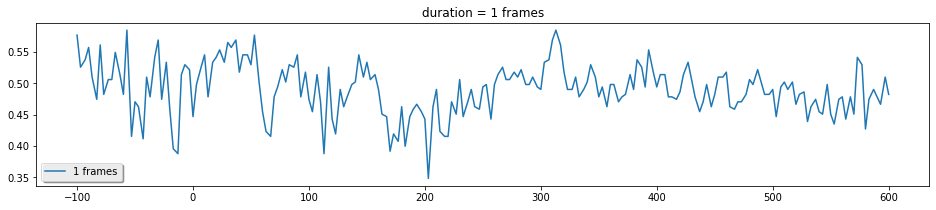

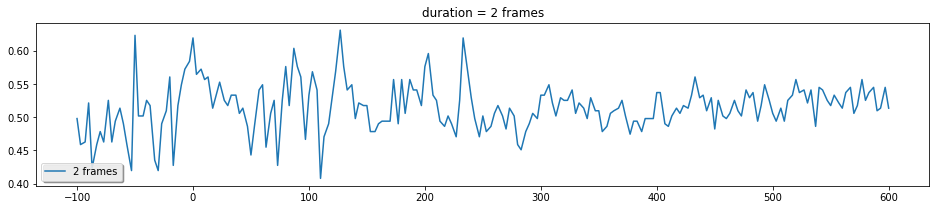

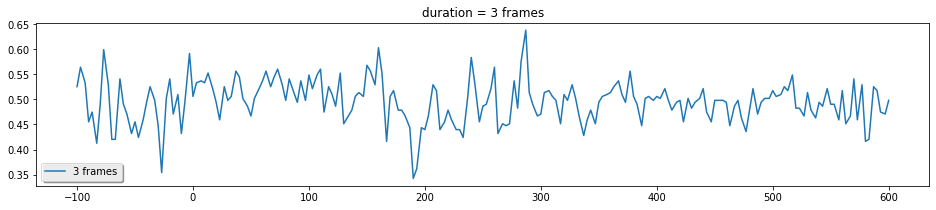

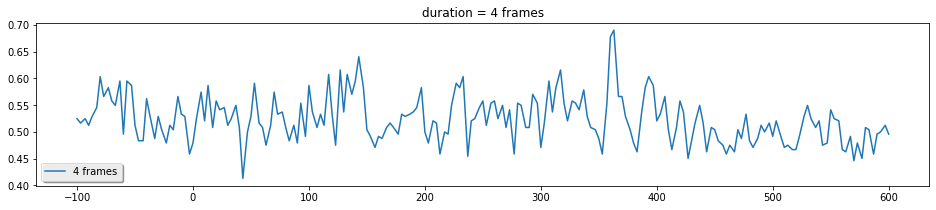

In [186]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
    plt.figure(figsize=(16, 3))
    plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frames')
    plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur]), :]).T, label = str(all_durs[cur_dur]) + ' frames');
    plt.savefig(mvpa_fname + '_sigmoid_dur' + str(all_durs[cur_dur]) + '.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

# Debug: Single-_t_ case

In [33]:
all_durs = [4]  # [1, 2, 3, 4]
all_conts = [100]  # [17, 33, 50, 100]
t = 160
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]

In [34]:
epochs_subset_df

channel                         MEG0111   MEG0112   MEG0113   MEG0121  \
condition          epoch time                                           
left/dur4/cont100  28    -100  1.610689 -1.334435  0.357122  1.172980   
                         -97   1.662126  0.151024  0.245054  1.051355   
                         -93   1.119060  0.664699  0.585302  1.121979   
                         -90   1.419339 -0.107888  1.020641  1.450687   
                         -87   1.290806 -0.583368 -0.566226  1.654823   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.167930 -1.786224 -3.949863  2.572864   
                          590 -0.474831  0.427726 -4.605781  2.374211   
                          593 -0.942890  1.387941 -4.254599  1.293214   
                          597 -0.754338 -0.794540 -3.232324  1.486582   
                          600 -0.628704 -0.707739 -3.467270  1.626736   

channel                         MEG0122   MEG0123   MEG0131   MEG0132  \
condition          epoch time                                           
left/dur4/cont100  28    -100  2.011091 -0.110198  0.907217  0.558846   
                         -97   1.396719 -0.089365  1.150332  1.072668   
                         -93  -0.889099  0.898352  1.186152  0.487312   
                         -90  -1.575564  1.130281  1.383846  0.070947   
                         -87  -1.340170  1.092753  1.557461 -0.120624   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.568288 -1.272248  0.698832 -0.696469   
                          590 -2.004040 -0.308461  0.481093 -0.424927   
                          593 -2.234754 -0.672880 -0.247038  0.638557   
                          597 -1.446546 -1.652420 -0.627605  0.637537   
                          600 -1.763028 -1.177448 -0.554681  0.485943   

channel                         MEG0133   MEG0141  ...   MEG2613   MEG2621  \
condition          epoch time                      ...                       
left/dur4/cont100  28    -100 -0.519565  1.360809  ...  0.398538 -1.207977   
                         -97   1.000138  2.019237  ...  0.136681 -1.314074   
                         -93   0.442295  1.552313  ...  0.583459 -1.465034   
                         -90  -0.498523  1.245797  ...  1.728040 -1.478539   
                         -87  -0.789245  1.133394  ...  1.534935 -0.834993   
...                                 ...       ...  ...       ...       ...   
right/dur4/cont100 80     587 -2.553035 -0.457694  ... -4.023089  0.223301   
                          590 -2.576332 -0.439530  ... -3.812698  0.246519   
                          593 -1.360856 -0.768171  ... -3.168895  0.041388   
                          597 -2.971802 -0.941390  ... -3.041159  0.223355   
                          600 -3.810544 -0.852254  ... -3.120419  0.565635   

channel                         MEG2622   MEG2623   MEG2631   MEG2632  \
condition          epoch time                                           
left/dur4/cont100  28    -100 -0.303150  1.652684 -0.945510 -1.418110   
                         -97  -0.565840  1.714372 -0.954582 -1.770175   
                         -93  -0.323455  0.648101 -1.142546 -1.504111   
                         -90   1.748897 -0.031146 -1.698851  0.369700   
                         -87   2.320423  0.308446 -1.340770  1.896537   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -1.035666  1.615875  0.390150  0.163755   
                          590 -1.153710  1.372623  0.536086 -0.088942   
                          593 -1.678995  1.903183  0.600947 -0.834262   
                          597 -2.236237  1.978202  1.009804 -0.769130   
                          600 -2.088028  1.867654  1.373922 -0.603343   

channel                         MEG2633   MEG2641   MEG2642   MEG2643  
condition          epoch time                                  

In [35]:
# cur_acc = iter_times(all_times, epochs_subset_df, validate=False)  #, cur_cond_str)
all_times = np.round(epochs_run.times * 1000).astype(int)
epochs_subset_df_ = epochs_subset_df
X_right = epochs_subset_df_[epochs_subset_df_.index.get_level_values('condition').str.contains('right')].loc[pd.IndexSlice[:, :, t], :]
X_left = epochs_subset_df_[epochs_subset_df_.index.get_level_values('condition').str.contains('left')].loc[pd.IndexSlice[:, :, t], :]
X = np.concatenate((X_right, X_left))
y = np.concatenate((np.repeat(1, len(X_right)), np.repeat(0, len(X_left))))

In [36]:
X

array([[-0.36956135,  0.73309373,  1.06787516, ..., -1.02585017,
         1.51615724,  0.5398533 ],
       [-0.63515547, -1.75963522, -0.61388964, ..., -0.02011868,
        -0.05264576,  2.30493699],
       [-1.41267804, -0.62703626,  0.36229909, ..., -0.47400222,
        -0.2081244 ,  0.60332903],
       ...,
       [ 0.11251103, -1.44801505,  1.21179409, ..., -1.68234264,
        -2.24900444,  0.28792588],
       [ 1.43788679,  0.67557765, -2.07941639, ..., -2.65712268,
         2.471605  , -0.35784792],
       [ 0.208613  ,  1.15984312,  1.16977831, ..., -0.89274005,
        -0.40062375, -2.37701663]])

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# acc_.append(run_svm(X, y))
cur_test_epoch = 0
X_ = X
y_ = y
preds = []
test_epoch = [X_[cur_test_epoch, :]]
print(test_epoch)
test_class = y_[cur_test_epoch]
print(test_class)
train_epochs = X_[np.arange(len(y_))!=cur_test_epoch, :]
print(train_epochs)
train_classes = y_[np.arange(len(y_))!=cur_test_epoch]
print(train_classes)
clf = svm.SVC()
clf.fit(train_epochs, train_classes)
# preds.append(clf.predict(test_epoch).item(0))
# tests.append(test_class)
# this_pred = clf.predict(test_epoch).item()
this_pred = clf.decision_function(test_epoch)
print('class = ' + str(test_class) + ' prediction = ' + str(this_pred))
iter_acc = sum(np.array(test_class) == np.array(preds)) / len(y_)
preds.append(this_pred)
#     iter_acc = sum(y_ == np.array(preds)) / len(y_)
# iter_acc = sum(np.array(test_class) == np.array(preds)) / len(y_)
#     print(iter_acc)
# print(cur_acc)
# acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

[array([-0.36956135,  0.73309373,  1.06787516, -0.75755323,  0.08489705,
        1.55960791,  0.00894992, -1.04439436,  2.36432964,  0.45551303,
        2.27344104, -0.32096662,  0.23060278,  2.52360691, -0.26085406,
        0.17762013, -0.26240576,  2.15601738,  1.9477414 ,  0.88227018,
        1.02098076,  2.71235764,  0.92814475, -0.41382401, -2.45589901,
        0.89171529,  1.32924547, -1.65028386, -0.90764129,  4.32961109,
       -1.46350941,  3.95418019, -1.16465851, -1.10256051,  4.34931479,
        0.10169362, -0.06588309,  1.1348421 ,  0.30331055, -0.00723888,
       -1.48845733,  0.87922055,  0.41411137, -2.61283308,  1.08089786,
        0.31051695,  0.82107578,  0.6177865 , -2.98149601, -0.86486361,
        1.69392695, -2.59793124, -2.70112497,  1.40536888, -3.19943117,
       -0.10398802, -2.53076745, -3.38371282, -1.40825588, -0.0995284 ,
       -2.51236648, -0.60546487, -1.67164513, -0.93175466, -3.39756426,
       -1.13540022,  0.41402291, -0.71647768, -1.54760779, -1.1

In [112]:
preds = []
tests = []
for cur_test_epoch in range(len(y_)):
    test_epoch = [X_[cur_test_epoch, :]]
    test_class = y_[cur_test_epoch]
    train_epochs = X_[np.arange(len(y_))!=cur_test_epoch, :]
    train_classes = y_[np.arange(len(y_))!=cur_test_epoch]
    clf = svm.SVC(kernel='poly')  # kernel='linear':43% vs. kernel='poly':41%
    clf.fit(train_epochs, train_classes)
#     preds.append(clf.predict(test_epoch).item(0))
    tests.append(test_class)
    this_pred = clf.predict(test_epoch).item()
#     this_pred = clf.decision_function(test_epoch)
    print('class = ' + str(test_class) + ' prediction = ' + str(this_pred))
    preds.append(this_pred)
#     iter_acc = sum(y_ == np.array(preds)) / len(y_)
print(sum(np.array(tests) == np.array(preds)) / len(y_))
#     print(iter_acc)

class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 1
class = 1 prediction = 0
class = 1 prediction = 1
class = 1 prediction = 1
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 1 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 1
class = 0 prediction = 1
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 0
class = 0 prediction = 1


# Debug: Single-condition linear

## Validation

In [96]:
all_durs = [4]  # [1, 2, 3, 4]
all_conts = [100]  # [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=True)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur4/cont100 [==========]


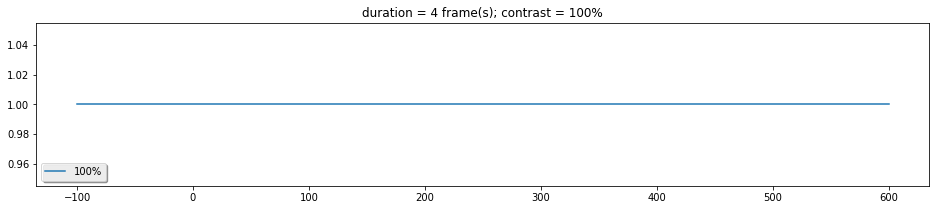

In [97]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

## Training

In [98]:
all_durs = [4]  # [1, 2, 3, 4]
all_conts = [100]  # [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=False)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur4/cont100 [==========]


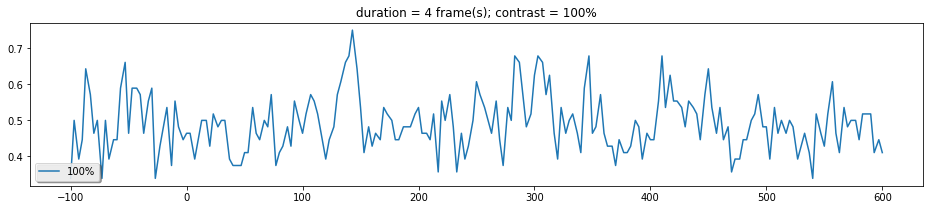

In [99]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

# Debug: Single-condition poly

## Validation

In [115]:
all_durs = [4]  # [1, 2, 3, 4]
all_conts = [100]  # [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=True)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur4/cont100 [==========]


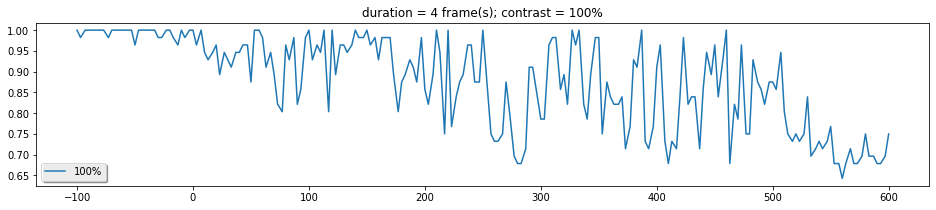

In [116]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

## Training

In [120]:
all_durs = [4]  # [1, 2, 3, 4]
all_conts = [100]  # [17, 33, 50, 100]
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
        cur_acc = iter_times(all_times, epochs_subset_df, validate=False)  #, cur_cond_str)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur4/cont100 [==========]


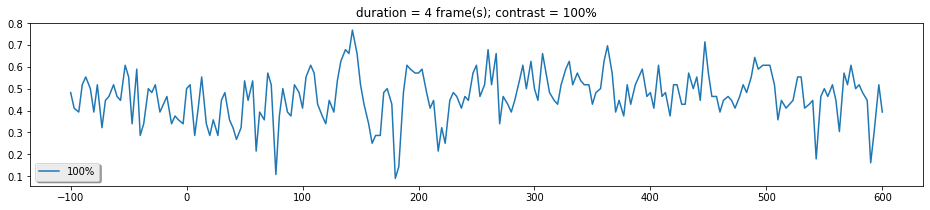

In [121]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

# Cross-validation

In [188]:
from sklearn.model_selection import GridSearchCV

In [199]:
cv_times = all_times[30:76]   # np.round(epochs_run.times * 1000).astype(int)
cv_times

array([  0,   3,   7,  10,  13,  17,  20,  23,  27,  30,  33,  37,  40,
        43,  47,  50,  53,  57,  60,  63,  67,  70,  73,  77,  80,  83,
        87,  90,  93,  97, 100, 103, 107, 110, 113, 117, 120, 123, 127,
       130, 133, 137, 140, 143, 147, 150])

In [200]:
# param_grid = {"C": [0.001, 0.01, 0.1, 1, 1.5],
#             "gamma": [0.001, 0.01, 0.1, 1, 10],
#             "kernel": ['linear', 'rbf', 'sigmoid', 'poly'],
#             "decision_function_shape": ['ovo'],
#             }
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']},
]

In [ ]:
# Taking values for a single timepoint:
X = epochs_df

In [ ]:
grid_clf = GridSearchCV(svm.SVC, param_grid=param_grid, cv=5, refit=True, n_jobs=4, pre_dispatch=8)
grid_clf.fit(training_features, training_labels)
rbf_clf = grid_cv.best_estimator_
rbf_clf.fit(training_features, training_labels)
prediction = rbf_clf.predict(training_features)
print(prediction)
print(testing_labels)
print(rbf_clf.decision_function(training_features))

# P.S.

In [27]:
%matplotlib
%matplotlib qt

Using matplotlib backend: Qt5Agg


In [28]:
interactive = True